<a href="https://colab.research.google.com/github/Sumana-ghosh/Python_Data_analysis_on_Traffic_police_data/blob/main/police_traffic_stop_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Python Libraries 

In [3]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Importing the dataset

In [4]:
file_path = '/content/drive/MyDrive/Self projects/Police_data/Police Data.csv'
police_df = pd.read_csv(file_path)

##Exploring the dataset

In [5]:
police_df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [7]:
police_df.shape

(65535, 15)

In [8]:
#check the number of unique values for each column
police_df.nunique()

stop_date             2651
stop_time             1432
country_name             0
driver_gender            2
driver_age_raw          93
driver_age              73
driver_race              5
violation_raw           12
violation                6
search_conducted         2
search_type             23
stop_outcome             6
is_arrested              2
stop_duration            4
drugs_related_stop       2
dtype: int64

In [9]:
# get all the columns with categorical data
cat_cols = list(police_df.select_dtypes(include='object').columns)
print(f'Categorical columns: {cat_cols}')
print(f"Number of categorical columns:{len(cat_cols)}")

Categorical columns: ['stop_date', 'stop_time', 'driver_gender', 'driver_race', 'violation_raw', 'violation', 'search_type', 'stop_outcome', 'is_arrested', 'stop_duration']
Number of categorical columns:10


In [10]:
# get all the columns with categorical data
num_cols = list(police_df.select_dtypes(exclude='object').columns)
print(f'Categorical columns: {num_cols}')
print(f"Number of categorical columns:{len(num_cols)}")

Categorical columns: ['country_name', 'driver_age_raw', 'driver_age', 'search_conducted', 'drugs_related_stop']
Number of categorical columns:5


#Data Cleaning

###Removing the columns not containing any values or having high number of null values

In [11]:
#check the number of null values per column
police_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Number of Null values'})

,Columns,Number of Null values
0,country_name,65535
1,search_type,63056
2,driver_age,4307
3,driver_gender,4061
4,driver_race,4060
5,violation_raw,4060
6,violation,4060
7,stop_outcome,4060
8,is_arrested,4060
9,stop_duration,4060


In [12]:
missing_values = (police_df.isna().sum().sort_values(ascending=False)*100)/len(police_df)
missing_values = missing_values.reset_index().rename(columns={'index':'Columns',0:'% of Null values'})
missing_values

,Columns,% of Null values
0,country_name,100.000000
1,search_type,96.217288
2,driver_age,6.572061
3,driver_gender,6.196689
4,driver_race,6.195163
5,violation_raw,6.195163
6,violation,6.195163
7,stop_outcome,6.195163
8,is_arrested,6.195163
9,stop_duration,6.195163


Since country_name and search_type have 100% and 96.22% missing values, respectively, we can drop these two columns from the dataset

In [13]:
#dropping the 'country_name' and 'search_type' columns and forming a new dataframe
pol_df = police_df.drop(['country_name'], axis = 1)

In [14]:
pol_df = pol_df.drop(['search_type'], axis = 1)

In [15]:
#checking records with null values 
pol_df[pol_df.isna().any(axis=1)]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
25,9/3/2005,16:02,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
29,9/26/2005,1:05,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52,10/1/2005,13:09,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
110,10/3/2005,19:50,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
124,10/4/2005,11:43,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65427,12/2/2012,3:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
65488,12/5/2012,8:35,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
65493,12/5/2012,13:20,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
65502,12/5/2012,23:57,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False


Since most of the columns contains null values for the above records, it is best to exclude them from the analysis

In [16]:
pol_df = pol_df.dropna()

In [17]:
pol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61222 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           61222 non-null  object 
 1   stop_time           61222 non-null  object 
 2   driver_gender       61222 non-null  object 
 3   driver_age_raw      61222 non-null  float64
 4   driver_age          61222 non-null  float64
 5   driver_race         61222 non-null  object 
 6   violation_raw       61222 non-null  object 
 7   violation           61222 non-null  object 
 8   search_conducted    61222 non-null  bool   
 9   stop_outcome        61222 non-null  object 
 10  is_arrested         61222 non-null  object 
 11  stop_duration       61222 non-null  object 
 12  drugs_related_stop  61222 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 5.7+ MB


#Exploratory Data Analysis

###1. How many male vs. female were stopped for speeding?

In [18]:
speeding_df = pol_df[pol_df['violation']== 'Speeding'].driver_gender.value_counts()
speeding_df

M    25458
F    11661
Name: driver_gender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution of People Stopped for Speeding')

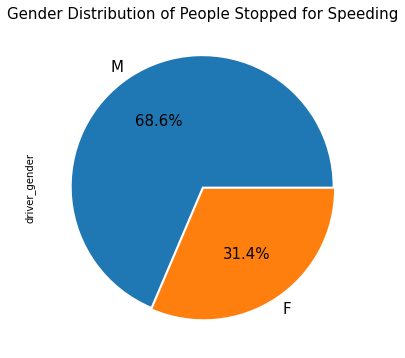

In [19]:
#plotting a pie chart
speeding_df.plot.pie(explode=[0.01, 0.01], autopct='%1.1f%%', shadow=False, figsize=(6,6),fontsize=15)   
plt.title('Gender Distribution of People Stopped for Speeding',fontsize= 15)

###2. How many male vs. female gets searched at a stop?

In [20]:
search_df = pol_df.groupby('driver_gender')['search_conducted'].sum()
search_df

driver_gender
F     366
M    2111
Name: search_conducted, dtype: int64

Text(0.5, 1.0, 'Gender Distribution of People searched at a Stop')

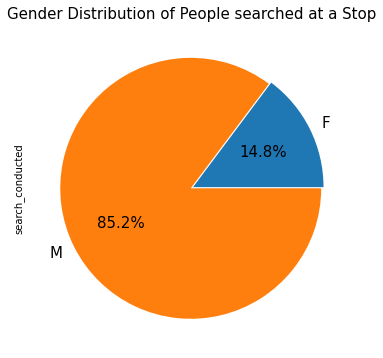

In [21]:
#plotting a pie chart
search_df.plot.pie(explode=[0.01, 0.01], autopct='%1.1f%%', shadow=False, figsize=(6,6),fontsize=15)   
plt.title('Gender Distribution of People searched at a Stop',fontsize= 15)

###3. What is the mean_stop_duration?

In [22]:
pol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61222 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           61222 non-null  object 
 1   stop_time           61222 non-null  object 
 2   driver_gender       61222 non-null  object 
 3   driver_age_raw      61222 non-null  float64
 4   driver_age          61222 non-null  float64
 5   driver_race         61222 non-null  object 
 6   violation_raw       61222 non-null  object 
 7   violation           61222 non-null  object 
 8   search_conducted    61222 non-null  bool   
 9   stop_outcome        61222 non-null  object 
 10  is_arrested         61222 non-null  object 
 11  stop_duration       61222 non-null  object 
 12  drugs_related_stop  61222 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 5.7+ MB


In [23]:
pol_df.stop_duration.value_counts()

0-15 Min     47202
16-30 Min    11377
30+ Min       2642
2                1
Name: stop_duration, dtype: int64

In [24]:
#replacing object type stop duation with mean time 
pol_df['stop_duration'] = pol_df['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min': 23,'30+ Min': 45})

In [25]:
pol_df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,23.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [26]:
#mean stop duration
pol_df['stop_duration'][pol_df['stop_duration'] != 2].mean()

11.998758595906633

###4. Comparing the age distribution based on violation.

In [27]:
viol_age = pol_df.groupby('violation_raw').driver_age.describe()
viol_age

,count,mean,std,min,25%,50%,75%,max
violation_raw,,,,,,,,
APB,50.0,35.360000,11.547170,18.0,26.00,34.0,42.75,72.0
Call for Service,786.0,33.717557,13.153832,16.0,23.00,30.0,42.00,86.0
Equipment/Inspection Violation,6507.0,31.682957,11.380671,16.0,23.00,28.0,39.00,81.0
Motorist Assist/Courtesy,127.0,35.464567,12.424244,17.0,25.00,32.0,46.00,63.0
Other Traffic Violation,11876.0,36.736443,13.258350,15.0,25.00,35.0,47.00,86.0
Registration Violation,2240.0,32.656696,11.150780,16.0,24.00,30.0,40.00,74.0
Seatbelt Violation,3.0,30.333333,10.214369,23.0,24.50,26.0,34.00,42.0
Special Detail/Directed Patrol,2298.0,43.549608,11.430333,17.0,35.00,44.0,52.00,78.0
Speeding,37119.0,33.262803,12.615878,15.0,23.00,30.0,42.00,88.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

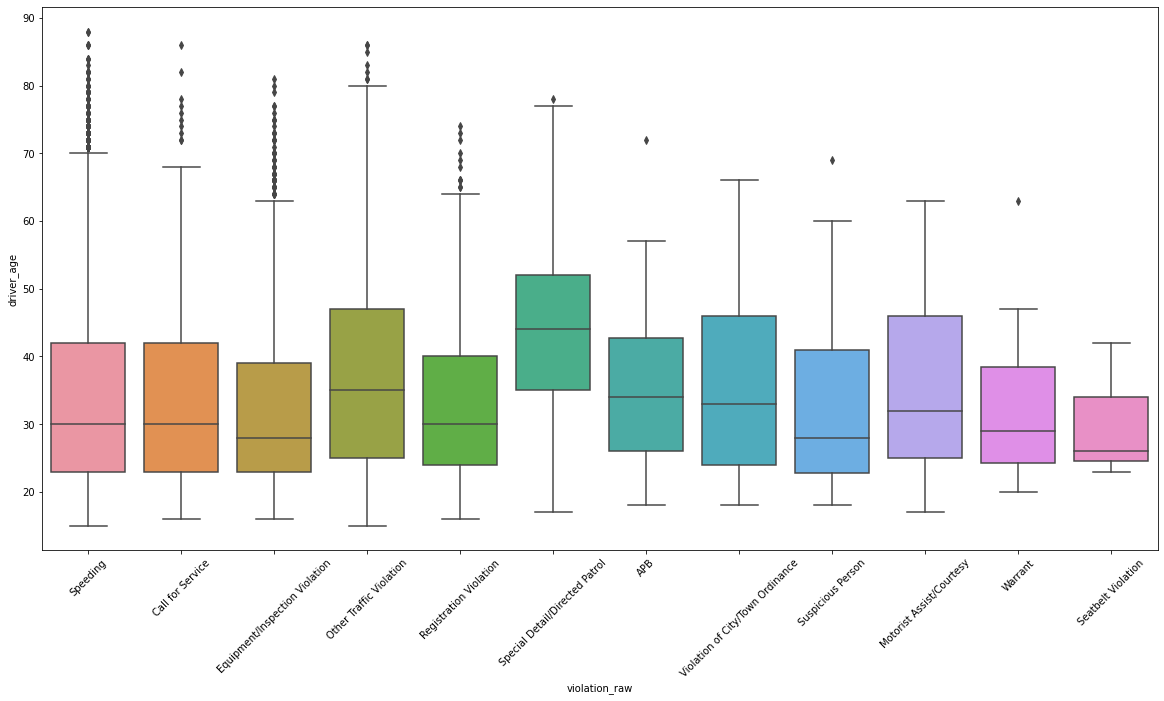

In [28]:
#box-plot
plt.figure(figsize=(20,10))
sns.boxplot(x='violation_raw', y='driver_age', data=pol_df)
plt.xticks(rotation=45)

### 5. Count of different violations.

In [29]:
#count of different violations
violation = pol_df['violation_raw'].value_counts().reset_index().rename(columns={'index': 'Violation','violation_raw': 'Count'})
violation


,Violation,Count
0,Speeding,37119
1,Other Traffic Violation,11876
2,Equipment/Inspection Violation,6507
3,Special Detail/Directed Patrol,2298
4,Registration Violation,2240
5,Call for Service,786
6,Violation of City/Town Ordinance,170
7,Motorist Assist/Courtesy,127
8,APB,50
9,Suspicious Person,36


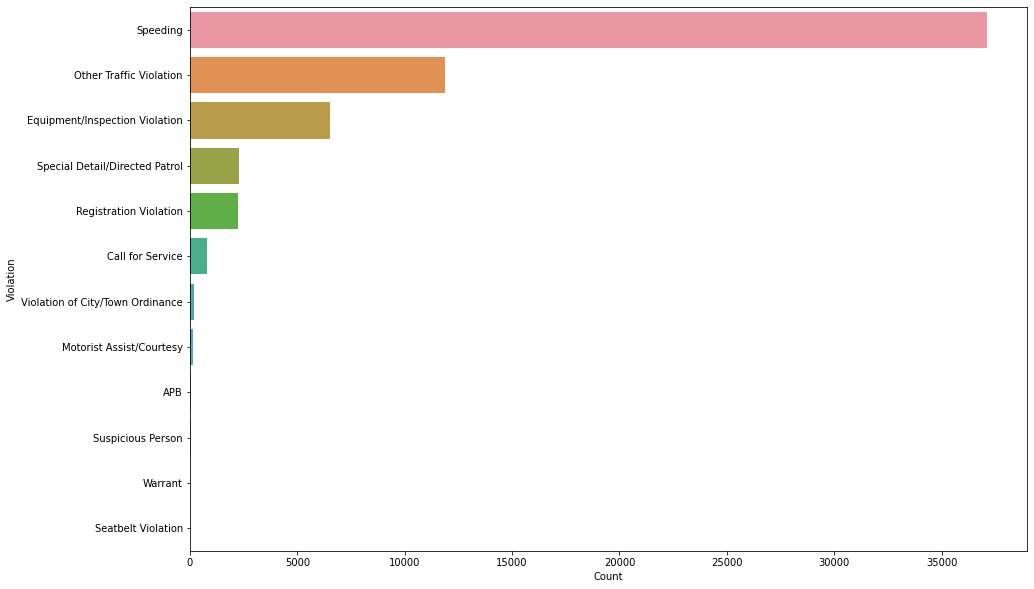

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x= 'Count',y='Violation',  data= violation)

In [31]:
#violation vs search_conducted
violation_search = pol_df.groupby(['violation_raw','search_conducted'])['violation_raw'].count().unstack()
violation_search = violation_search.reset_index()
violation_search

search_conducted,violation_raw,False,True
0,APB,34.0,16.0
1,Call for Service,699.0,87.0
2,Equipment/Inspection Violation,5968.0,539.0
3,Motorist Assist/Courtesy,118.0,9.0
4,Other Traffic Violation,11186.0,690.0
5,Registration Violation,1951.0,289.0
6,Seatbelt Violation,3.0,NaN
7,Special Detail/Directed Patrol,2274.0,24.0
8,Speeding,36324.0,795.0
9,Suspicious Person,25.0,11.0


In [32]:
#violation vs stop_outcome
violation_outcome = pol_df.groupby(['violation_raw','stop_outcome'])['violation_raw'].count().unstack()
violation_outcome = violation_outcome.reset_index()
violation_outcome

stop_outcome,violation_raw,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
0,APB,17.0,NaN,28.0,NaN,1.0,4.0
1,Call for Service,186.0,NaN,480.0,6.0,108.0,6.0
2,Equipment/Inspection Violation,362.0,108.0,5084.0,327.0,40.0,586.0
3,Motorist Assist/Courtesy,7.0,2.0,43.0,2.0,71.0,2.0
4,Other Traffic Violation,641.0,67.0,10613.0,29.0,42.0,484.0
5,Registration Violation,252.0,24.0,1887.0,15.0,13.0,49.0
6,Seatbelt Violation,NaN,NaN,3.0,NaN,NaN,NaN
7,Special Detail/Directed Patrol,14.0,1.0,2269.0,NaN,8.0,6.0
8,Speeding,504.0,44.0,35822.0,43.0,24.0,682.0
9,Suspicious Person,9.0,4.0,9.0,NaN,7.0,7.0


###6. Time of the day in which most stops occur?

In [33]:
pol_df['stop_time'].dtype

dtype('O')

In [34]:
#convert object type string to time for stop_time column
pol_df['stop_hour'] = pd.to_datetime(pol_df['stop_time'], format='%H:%M').dt.hour

In [35]:
pol_df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False,1
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False,8
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False,23
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,23.0,False,17
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,12/6/2012,16:00,M,1994.0,18.0,White,Speeding,Speeding,False,Citation,False,7.5,False,16
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,7.5,False,17
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,7.5,False,22
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,7.5,False,23


In [36]:
#hour with most stops
time = pol_df['stop_hour'].value_counts().reset_index().rename(columns={'index': 'Time_in_h','stop_hour': 'Stop_Count'})

[[<matplotlib.axis.XTick at 0x7ff94f69ad90>,

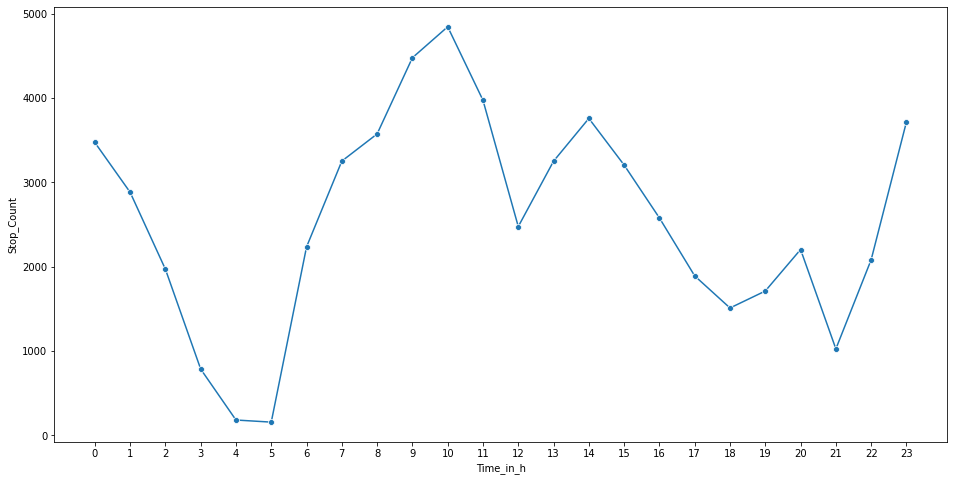

In [37]:
plt.figure(figsize=(16,8))
ax= sns.lineplot(x= 'Time_in_h',y= 'Stop_Count',data= time, marker = "o")
ax.set(xticks=time.Time_in_h.values)

### 7. Number of Drugs-related stops.

Text(0.5, 1.0, 'Drugs related Stop')

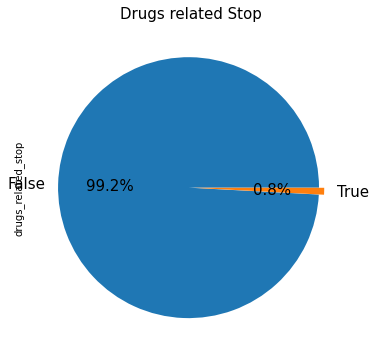

In [38]:
#plotting a pie chart
pol_df['drugs_related_stop'].value_counts().plot.pie(explode=[0.02, 0.02], autopct='%1.1f%%', shadow=False, figsize=(6,6),fontsize=15)   
plt.title('Drugs related Stop',fontsize= 15)

### 8. Percentage of arrests made.

Text(0.5, 1.0, 'Arrest %')

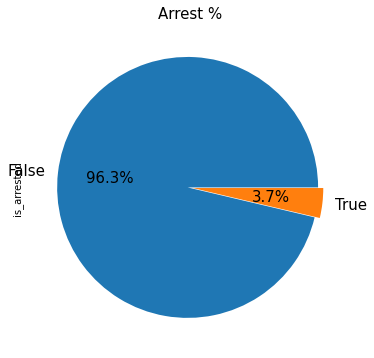

In [39]:
#plotting a pie chart
pol_df['is_arrested'].value_counts().plot.pie(explode=[0.02, 0.02], autopct='%1.1f%%', shadow=False, figsize=(6,6),fontsize=15)   
plt.title('Arrest %',fontsize= 15)

###9. Relation between the driver's race vs. stopping a car, searching a car, or arresting the driver.

In [40]:
#race-bias in stopping a car
race_df = pol_df['driver_race'].value_counts().reset_index().rename(columns={'index': 'driver_race','driver_race': 'Stop_Count'})
race_df

,driver_race,Stop_Count
0,White,45572
1,Black,8223
2,Hispanic,5583
3,Asian,1634
4,Other,210


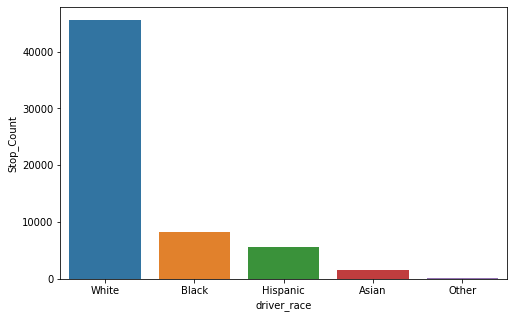

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'driver_race',y='Stop_Count',  data= race_df)

In [42]:
#number of search conducted 
race_df2 = pol_df.groupby(['driver_race','search_conducted'])['driver_race'].count().unstack()
race_df2 = race_df2.reset_index()
race_df2

search_conducted,driver_race,False,True
0,Asian,1598,36
1,Black,7608,615
2,Hispanic,5176,407
3,Other,209,1
4,White,44154,1418


In [43]:
merge_df = pd.merge(
    left= race_df,
    right = race_df2,
    how="inner",
    on= 'driver_race',
    copy=True,
    )
merge_df = merge_df.rename(columns={False:'not_searched',True:'searched'})
merge_df['search_%'] = round((merge_df['searched']/merge_df['Stop_Count'])*100,2)
merge_df

,driver_race,Stop_Count,not_searched,searched,search_%
0,White,45572,44154,1418,3.11
1,Black,8223,7608,615,7.48
2,Hispanic,5583,5176,407,7.29
3,Asian,1634,1598,36,2.20
4,Other,210,209,1,0.48


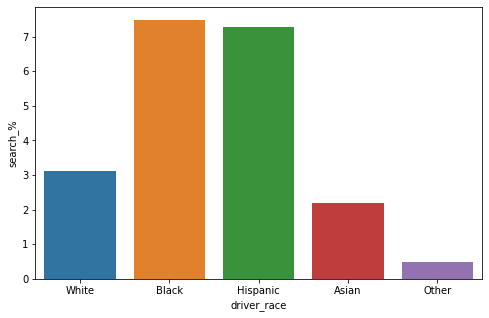

In [44]:
#plot a bar graph
plt.figure(figsize=(8,5))
sns.barplot(x= 'driver_race',y='search_%',  data= merge_df)

In [45]:
#race bias in arrests
race_df3 = pol_df.groupby(['driver_race','is_arrested'])['driver_race'].count().unstack()
race_df3 = race_df3.reset_index()
race_df3

is_arrested,driver_race,False,True
0,Asian,1603,31
1,Black,7679,544
2,Hispanic,5221,362
3,Other,208,2
4,White,44253,1319


In [46]:
merge_df = pd.merge(
    left= race_df,
    right = race_df3,
    how="inner",
    on= 'driver_race',
    copy=True,
    )
merge_df = merge_df.rename(columns={False:'not_arrested',True:'arrested'})
merge_df['arrest_%'] = round((merge_df['arrested']/merge_df['Stop_Count'])*100,2)
merge_df

,driver_race,Stop_Count,not_arrested,arrested,arrest_%
0,White,45572,44253,1319,2.89
1,Black,8223,7679,544,6.62
2,Hispanic,5583,5221,362,6.48
3,Asian,1634,1603,31,1.90
4,Other,210,208,2,0.95


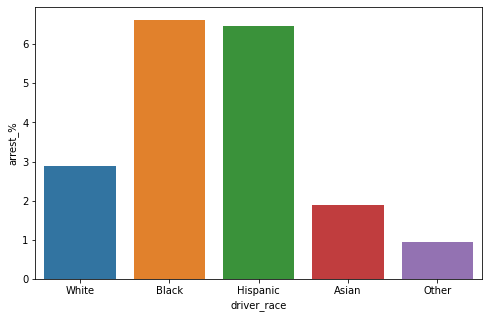

In [47]:
#plot a bar graph
plt.figure(figsize=(8,5))
sns.barplot(x= 'driver_race',y='arrest_%',  data= merge_df)

###10. Traffic Violation across Years.

In [48]:
pol_df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False,1
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False,8
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False,23
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,23.0,False,17
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False,10


In [49]:
#convert object type string to datetime for stop_date column
pol_df['stop_year'] = pd.to_datetime(pol_df['stop_date'], format = '%m/%d/%Y').dt.year
pol_df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_year
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False,1,2005
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False,8,2005
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False,23,2005
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,23.0,False,17,2005
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False,10,2005


In [50]:
year_df = pol_df['stop_year'].value_counts().reset_index().rename(columns={'index': 'Year','stop_year': 'Count'})
year_df = year_df.sort_values(by='Year')
year_df

,Year,Count
7,2005,2489
0,2006,10101
2,2007,8888
3,2008,8077
5,2009,7193
6,2010,6952
4,2011,7566
1,2012,9956


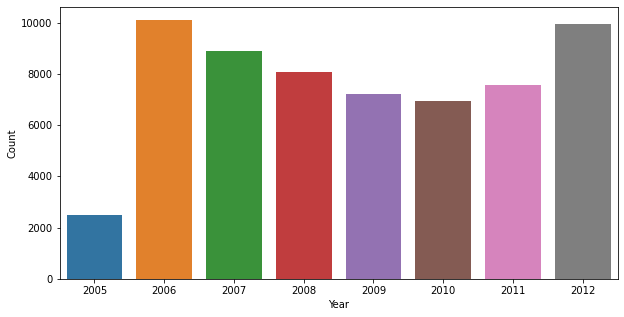

In [51]:
#plotting a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x= 'Year',y= 'Count',data= year_df)